# Support Vector Machines - 2

In [13]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

### EDA

In [14]:
train_Salarydata = pd.read_csv('SalaryData_Train(1).csv')
test_Salarydata = pd.read_csv('SalaryData_Test(1).csv')

In [15]:
train_Salarydata

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
test_Salarydata

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [17]:
test_Salarydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [22]:
train_Salarydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [23]:
train_Salarydata.shape

(30161, 14)

In [24]:
test_Salarydata.shape

(15060, 14)

In [29]:
data=train_Salarydata.copy()
data2=test_Salarydata.copy()
data.head(2)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K


In [31]:
le = preprocessing.LabelEncoder()
data['workclass']= le.fit_transform(data['workclass'])
data['maritalstatus']= le.fit_transform(data['maritalstatus'])
data['occupation']= le.fit_transform(data['occupation'])
data['relationship']= le.fit_transform(data['relationship'])
data['race']= le.fit_transform(data['race'])
data['sex']= le.fit_transform(data['sex'])
data['Salary']= le.fit_transform(data['Salary'])

In [32]:
le = preprocessing.LabelEncoder()
data2['workclass']= le.fit_transform(data2['workclass'])
data2['maritalstatus']= le.fit_transform(data2['maritalstatus'])
data2['occupation']= le.fit_transform(data2['occupation'])
data2['relationship']= le.fit_transform(data2['relationship'])
data2['race']= le.fit_transform(data2['race'])
data2['sex']= le.fit_transform(data2['sex'])
data2['native']= le.fit_transform(data2['native'])
data2['Salary']= le.fit_transform(data2['Salary'])

In [33]:
data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,0
1,50,4,13,2,3,0,4,1,0,0,13,0
2,38,2,9,0,5,1,4,1,0,0,40,0
3,53,2,7,2,5,0,2,1,0,0,40,0
4,28,2,13,2,9,5,2,0,0,0,40,0


In [34]:
data2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,11th,7,4,6,3,2,1,0,0,40,37,0
1,38,2,HS-grad,9,2,4,0,4,1,0,0,50,37,0
2,28,1,Assoc-acdm,12,2,10,0,4,1,0,0,40,37,1
3,44,2,Some-college,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,10th,6,4,7,1,4,1,0,0,30,37,0


In [36]:
data.drop(['educationno'],axis=1,inplace=True)
data2.drop(['educationno'],axis=1,inplace=True)
data.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [37]:
data2.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [25]:
train_Salarydata.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'maritalstatus'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>,
        <AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>]],
      dtype=object)

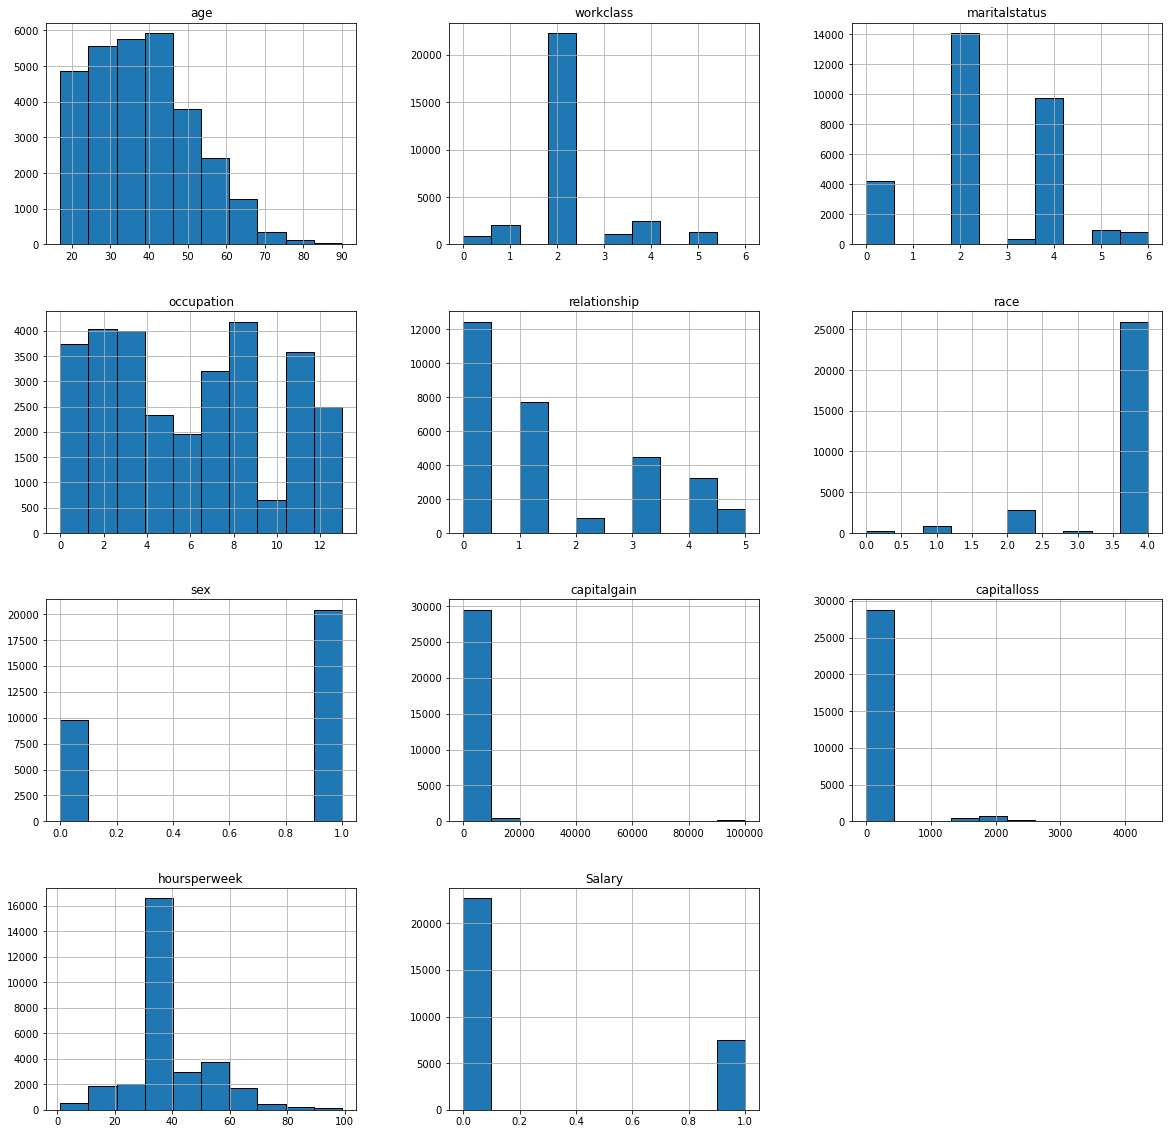

In [38]:
import seaborn as sns
data.hist(edgecolor='black',figsize=(20,20),linewidth=1)

In [39]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [40]:
X2=data2.iloc[:,:-1]
Y2=data2.iloc[:,-1]

## Splitting data into test data and train data


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,data['Salary'], test_size=0.3, random_state=42)

In [50]:
x_train

,age,workclass,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
27112,35,2,2,2,0,4,1,0,0,40,1
13212,23,2,2,5,0,4,1,0,0,40,0
24111,39,2,2,3,5,4,0,0,0,60,1
22501,33,2,0,7,4,4,0,0,0,32,0
3872,27,3,5,0,1,4,1,0,0,38,0
...,...,...,...,...,...,...,...,...,...,...,...
29802,36,2,2,3,5,4,0,0,0,37,0
5390,41,4,2,6,0,4,1,3103,0,40,1
860,37,2,2,2,0,4,1,0,0,99,1
15795,56,4,2,7,5,4,0,0,0,40,0


In [51]:
x_test

,age,workclass,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
217,28,2,4,9,1,4,1,0,0,55,1
24912,41,2,2,2,0,1,1,0,0,40,0
17780,53,2,2,7,0,4,1,0,0,50,1
12484,31,2,2,2,0,4,1,0,0,45,0
8890,34,1,3,9,1,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
20990,32,2,2,11,2,1,0,0,0,40,0
23327,47,4,2,2,0,4,1,0,0,40,1
24639,41,2,5,9,1,2,0,99999,0,60,1
7738,24,2,4,11,1,4,1,0,0,30,0


In [52]:
y_train

27112    1
13212    0
24111    1
22501    0
3872     0
        ..
29802    0
5390     1
860      1
15795    0
23654    0
Name: Salary, Length: 21112, dtype: int32

In [53]:
y_test

217      1
24912    0
17780    1
12484    0
8890     0
        ..
20990    0
23327    1
24639    1
7738     0
3882     0
Name: Salary, Length: 9049, dtype: int32

## Building model with Grid Search CV

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_ , gsv.best_score_ 

In [ ]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

## Splitting data into test data and train data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(test_data,test_data['Salary'], test_size=0.3, random_state=42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
Y_train

In [ ]:
Y_test

## Building model with Grid Search CV

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_ , gsv.best_score_ 

In [ ]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)